In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = pd.read_csv('../Downloads/adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
print("The number of total entries: " +str(len(data)))

The number of total entries: 32561


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
## DATA WRANGLING

In [8]:
Income = pd.get_dummies(data['income'],drop_first=True)
Income

,>50K
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,1
32559,0


In [9]:
Sex = pd.get_dummies(data['sex'],drop_first=True)
Sex

,Male
0,0
1,0
2,0
3,0
4,0
...,...
32556,1
32557,0
32558,1
32559,0


In [14]:
data = pd.concat([data, Sex, Income],axis=1)

In [16]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Male,>50K,Male,>50K
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0,0,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0,0,0,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0,0,0,0


In [20]:
data.drop('income',axis=1).head()
data.drop('sex',axis=1).head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,capital.gain,capital.loss,hours.per.week,native.country,income,Male,>50K,Male,>50K
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,0,4356,40,United-States,<=50K,0,0,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,4356,18,United-States,<=50K,0,0,0,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,0,4356,40,United-States,<=50K,0,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,3900,40,United-States,<=50K,0,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,3900,40,United-States,<=50K,0,0,0,0


In [40]:
# NEW CODE FROM OTHER RESOURCES, FROM SCRATCH FOR 2 FEATURES

X = data[["age","hours.per.week"]]

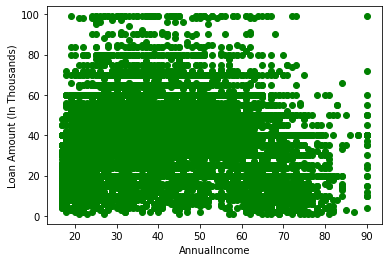

In [43]:
plt.scatter(X["age"],X["hours.per.week"],c='g')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

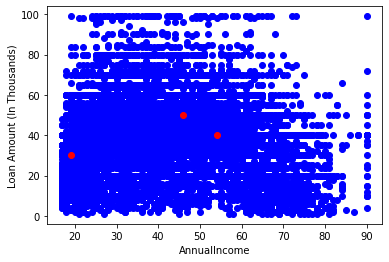

In [46]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["age"],X["hours.per.week"],c='b')
plt.scatter(Centroids["age"],Centroids["hours.per.week"],c='r')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

#Note that we have chosen these points randomly and hence every time you run this code, you might get different centroids.

In [48]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["age"]-row_d["age"])**2
            d2=(row_c["hours.per.week"]-row_d["hours.per.week"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["hours.per.week","age"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['hours.per.week'] - Centroids['hours.per.week']).sum() + (Centroids_new['age'] - Centroids['age']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["hours.per.week","age"]]

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1.4573438999553971
1.2633420257255636
0.1427537392788416
0.0041031560377327025
0.0


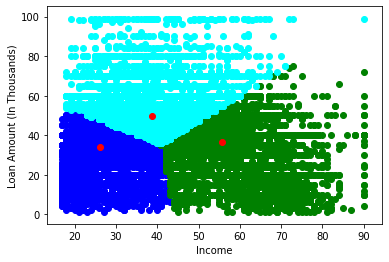

In [50]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["age"],data["hours.per.week"],c=color[k])
plt.scatter(Centroids["age"],Centroids["hours.per.week"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [53]:
# ANOTHER CODE USING SKLEARN LIBRARY

In [57]:
data1 = pd.read_csv('../Downloads/adult.csv')
data1.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [58]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5
count,1.171300e+04,1.171300e+04,1.171300e+04,1.171300e+04,1.171300e+04,11713.0
mean,4.612098e-16,1.074517e-15,-1.027570e-16,5.955470e-16,4.831930e-17,0.0
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,0.0
min,-2.902255e+00,-1.251306e+00,-1.111351e+00,-1.331321e+00,-1.512843e+00,0.0
25%,-5.288910e-01,-8.851534e-01,-6.517602e-01,-7.670462e-01,-4.585702e-01,0.0
50%,2.954771e-02,-1.528476e-01,-3.476044e-01,-2.412165e-01,-1.546117e-01,0.0
75%,5.879864e-01,4.879199e-01,4.493697e-01,5.082522e-01,2.863396e-02,0.0
max,7.149641e+00,4.515601e+00,6.857149e+00,5.257354e+00,8.557494e+00,0.0


In [59]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2)

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
# inertia on the fitted data
kmeans.inertia_

33816.523611021184

Text(0, 0.5, 'Inertia')

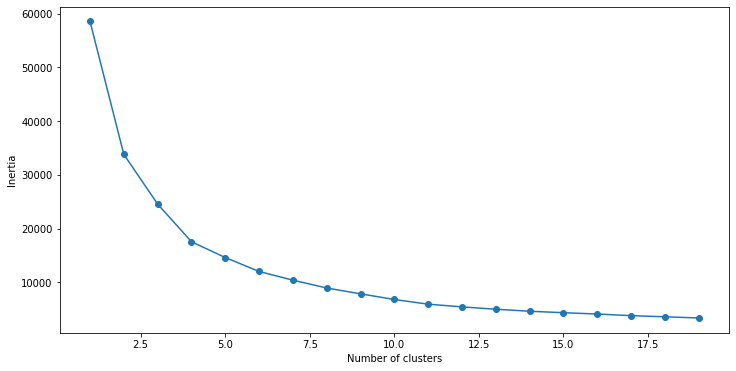

In [62]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [63]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [64]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

4    4358
1    3772
0    1796
3    1358
2     429
Name: cluster, dtype: int64